![tracker](https://us-central1-vertex-ai-mlops-369716.cloudfunctions.net/pixel-tracking?path=statmike%2Fvertex-ai-mlops%2FApplied+GenAI%2Fresources&file=Create+Files+For+Multimodal+Prompt+Examples.ipynb)
<!--- header table --->
<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/Applied%20GenAI/resources/Create%20Files%20For%20Multimodal%20Prompt%20Examples.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo">
      <br>Run in<br>Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https%3A%2F%2Fraw.githubusercontent.com%2Fstatmike%2Fvertex-ai-mlops%2Fmain%2FApplied%2520GenAI%2Fresources%2FCreate%2520Files%2520For%2520Multimodal%2520Prompt%2520Examples.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo">
      <br>Run in<br>Colab Enterprise
    </a>
  </td>      
  <td style="text-align: center">
    <a href="https://github.com/statmike/vertex-ai-mlops/blob/main/Applied%20GenAI/resources/Create%20Files%20For%20Multimodal%20Prompt%20Examples.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      <br>View on<br>GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/statmike/vertex-ai-mlops/main/Applied%20GenAI/resources/Create%20Files%20For%20Multimodal%20Prompt%20Examples.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      <br>Open in<br>Vertex AI Workbench
    </a>
  </td>
</table>

# Coreate Files For Multimodal Prompt Examples

This notebook makes example audio, video, image, and pdf content for other workflows in this series: [Applied GenAI](./Applied%20GenAI/readme.md)

---
## Colab Setup

To run this notebook in Colab run the cells in this section.  Otherwise, skip this section.

This cell will authenticate to GCP (follow prompts in the popup).

In [1]:
PROJECT_ID = 'statmike-mlops-349915' # replace with project ID

In [2]:
try:
    from google.colab import auth
    auth.authenticate_user()
    !gcloud config set project {PROJECT_ID}
    print('Colab authorized to GCP')
except Exception:
    print('Not a Colab Environment')
    pass

Not a Colab Environment


---
## Installs

The list `packages` contains tuples of package import names and install names.  If the import name is not found then the install name is used to install quitely for the current user.

In [3]:
# tuples of (import name, install name, min_version)
packages = [
    ('google.cloud.aiplatform', 'google-cloud-aiplatform', '1.69.0'),
    ('google.cloud.texttospeech', 'google-cloud-texttospeech'),
    ('numpy', 'numpy'),
    ('matplotlib', 'matplotlib'),
    ('pdfkit', 'pdfkit')
]

import importlib
install = False
for package in packages:
    if not importlib.util.find_spec(package[0]):
        print(f'installing package {package[1]}')
        install = True
        !pip install {package[1]} -U -q --user
    elif len(package) == 3:
        if importlib.metadata.version(package[0]) < package[2]:
            print(f'updating package {package[1]}')
            install = True
            !pip install {package[1]} -U -q --user

### API Enablement

In [4]:
!gcloud services enable aiplatform.googleapis.com
!gcloud services enable texttospeech.googleapis.com

### System Installs

In [5]:
#!sudo apt-get install -y ffmpeg

In [6]:
#!sudo apt-get install -y wkhtmltopdf

### Restart Kernel (If Installs Occured)

After a kernel restart the code submission can start with the next cell after this one.

In [7]:
if install:
    import IPython
    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)
    IPython.display.display(IPython.display.Markdown("""<div class=\"alert alert-block alert-warning\">
        <b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. The previous cells do not need to be run again⚠️</b>
        </div>"""))

---
## Setup

inputs:

In [8]:
project = !gcloud config get-value project
PROJECT_ID = project[0]
PROJECT_ID

'statmike-mlops-349915'

In [9]:
REGION = 'us-central1'
SERIES = 'applied-genai'
EXPERIMENT = 'gemini-api'

packages:

In [10]:
import os, io, base64, re

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
#from IPython.display import Markdown, HTML, IFrame, Video, Image, Audio
import IPython.display as display

import pdfkit

from google.cloud import texttospeech
from google.cloud import aiplatform
import vertexai
import vertexai.generative_models # for Gemini Models

In [11]:
aiplatform.__version__

'1.69.0'

clients:

In [12]:
vertexai.init(project = PROJECT_ID, location = REGION)
tts = texttospeech.TextToSpeechClient()

Parameters:

In [13]:
DIR = f"files/{EXPERIMENT}"

Environment:

In [14]:
if not os.path.exists(DIR):
    os.makedirs(DIR)

---
## Create Image

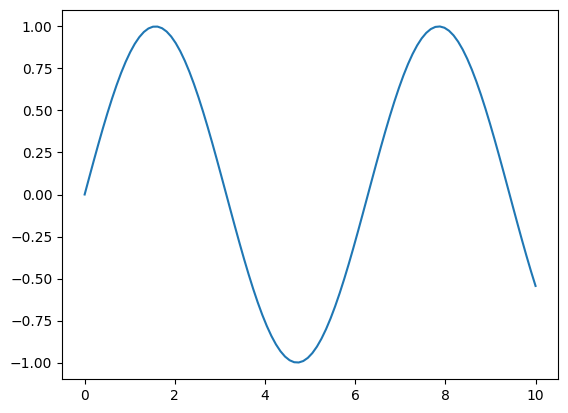

In [15]:
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)

buffer = io.BytesIO()
plt.savefig(buffer, format = 'png')
plot_bytes = buffer.getvalue()

# Save 
plt.savefig(f'{DIR}/plot.jpeg', format='jpeg')
plt.savefig(f'{DIR}/plot.png', format='png')
plt.savefig(f'{DIR}/plot.webp', format='webp')

plt.show()

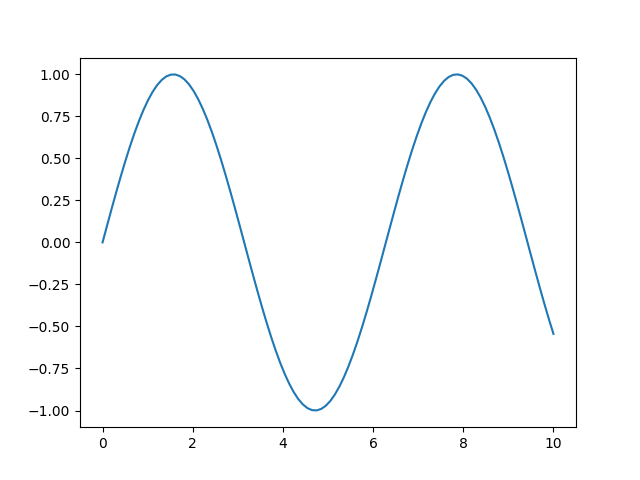

In [16]:
display.Image(f'{DIR}/plot.png')

---
## Create Video

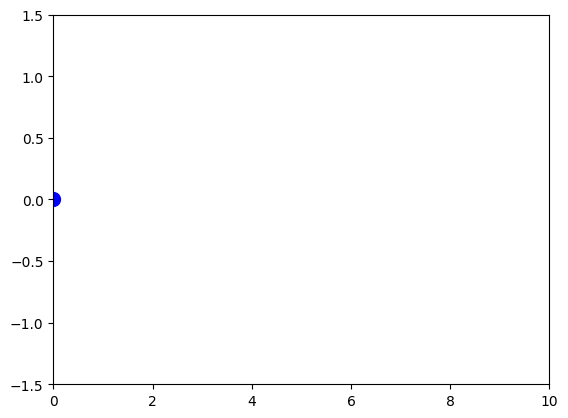

In [17]:
# Initialize the plot
fig, ax = plt.subplots()

# Set the x and y axis limits
ax.set_xlim(0, 10)  # Adjust the x-axis range if needed
ax.set_ylim(-1.5, 1.5)  # Adjust the y-axis range if needed

# Create the blue circle
circle = plt.scatter(x[0], y[0], s=100, c='blue')

# Animation update function
def animate(i):
    circle.set_offsets([x[i], y[i]])
    return circle,

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=len(x), interval=50)

# Save the animation as an MP4 file
writer = animation.FFMpegWriter(fps=30, codec='libx264')
ani.save(f'{DIR}/video.mp4', writer=writer)

# Embed the animation in the notebook
#plt.clf()
#display.HTML(ani.to_jshtml())

In [18]:
display.Video(f"{DIR}/video.mp4", embed=True)

---
## Create Audio

Use llm to get description of sin curve.  Then use TTS to create audio.

- [Cloud Text-to-Speech Client Libraries](https://cloud.google.com/text-to-speech/docs/create-audio-text-client-libraries)

In [30]:
gemini = vertexai.generative_models.GenerativeModel("gemini-1.5-flash-002")

In [31]:
response = gemini.generate_content('I need a detailed description of the sine curve, sin function, with history and interpretation.')

In [32]:
display.Markdown(response.text)

## The Sine Curve: A Detailed Description

The sine curve, represented by the function y = sin(x), is one of the most fundamental and ubiquitous functions in mathematics, science, and engineering. Its graphical representation is a smooth, oscillating wave that repeats itself infinitely. Let's delve into its detailed description, including its history and interpretations.

**1. Definition and Properties:**

The sine function, sin(x), is a trigonometric function that, for a right-angled triangle, is defined as the ratio of the length of the side opposite the angle to the length of the hypotenuse.  However, its definition is extended beyond right-angled triangles to encompass all real numbers (and even complex numbers).

Key properties of the sine function include:

* **Periodicity:** The sine function is periodic with a period of 2π. This means that sin(x + 2π) = sin(x) for all x.  The curve repeats its pattern every 2π units along the x-axis.
* **Amplitude:** The amplitude of the sine function is 1. This refers to the maximum displacement from the center line (the x-axis) of the curve.
* **Range:** The range of the sine function is [-1, 1]. This means the output values of sin(x) are always between -1 and 1, inclusive.
* **Domain:** The domain of the sine function is all real numbers (-∞, ∞). You can input any real number into the sine function.
* **Zeros:** The sine function has zeros at integer multiples of π (i.e., sin(nπ) = 0 where n is an integer). These are the points where the curve intersects the x-axis.
* **Symmetry:** The sine function is an odd function, meaning sin(-x) = -sin(x). This reflects in the graph's symmetry about the origin.


**2. Graphical Representation:**

The graph of y = sin(x) is a continuous wave that oscillates between -1 and 1.  It starts at (0, 0), rises to a maximum of 1 at x = π/2, falls back to 0 at x = π, reaches a minimum of -1 at x = 3π/2, and returns to 0 at x = 2π, completing one full cycle.  This cycle then repeats infinitely in both positive and negative x directions.


**3. History:**

The understanding and use of sine, in its rudimentary form, dates back to ancient civilizations.

* **Babylonian and Indian mathematics (around 5th century BC):**  Early forms of sine tables, expressing the ratio of the chord of an arc to the radius of a circle, were developed.  These weren't exactly sine as we know it, but they represented a crucial stepping stone.
* **Greek mathematics (Ptolemy, 2nd century AD):**  Claudius Ptolemy in his *Almagest* further refined the concept using chords, effectively providing a sine table for astronomical calculations.
* **Indian mathematics (Aryabhata, 5th century AD; Brahmagupta, 7th century AD):**  Indian mathematicians developed more accurate sine tables and explicitly defined sine as the half-chord, a significant advancement leading closer to the modern definition.
* **Islamic Golden Age (8th-13th centuries AD):**  Scholars like Al-Battani and Nasir al-Din al-Tusi significantly improved the accuracy of sine tables and explored sine's properties.  The word "sine" itself comes from a Latin translation of an Arabic word derived from the Sanskrit *jya* (chord).
* **European Renaissance (16th-17th centuries AD):**  With the development of calculus, the sine function gained its modern mathematical formulation, solidifying its place as a fundamental function.


**4. Interpretations and Applications:**

The sine function's versatility makes it indispensable across numerous fields:

* **Physics:**  Describes simple harmonic motion (like a pendulum's swing or a mass on a spring), wave propagation (sound waves, light waves, water waves), alternating current (AC) electricity, and many other oscillatory phenomena.
* **Engineering:** Used in signal processing, communication systems, control systems, and structural analysis (modeling vibrations and oscillations).
* **Mathematics:**  Fundamental in calculus, trigonometry, Fourier analysis (decomposing complex signals into simpler sine waves), and complex analysis.
* **Computer Graphics:**  Used extensively to model curves, waves, and other shapes.
* **Music:**  Modeling sound waves and musical tones.
* **Biology:** Modeling biological rhythms and oscillations (e.g., heartbeats, brainwaves).


In essence, the sine function is much more than just a mathematical abstraction; it's a powerful tool for modeling and understanding the cyclical and oscillatory nature of the world around us.  Its rich history reflects the long journey of mathematical discovery, culminating in its current status as a foundational concept with far-reaching applications.


In [33]:
script = response.text.encode('utf-8')[0:5000].decode('utf-8')

In [34]:
synth = texttospeech.SynthesisInput(text = script)
voice =texttospeech.VoiceSelectionParams(language_code = "en-us", name = 'en-US-Wavenet-A')
audio = texttospeech.AudioConfig(audio_encoding = texttospeech.AudioEncoding.MP3)
response = tts.synthesize_speech(input = synth, voice = voice, audio_config=audio)
with open(f"{DIR}/audio.mp3", "wb") as out:
  out.write(response.audio_content)

In [35]:
display.Audio(filename = f"./{DIR}/audio.mp3")

---
## Create PDF

In [23]:
gemini = vertexai.generative_models.GenerativeModel("gemini-1.5-flash-002")

In [42]:
#response = gemini.generate_content('Create an example invoice template.  Respond in HTML')
response = gemini.generate_content('I am working on a project where I am creating some sample files for a project for a customer.  I am creating a plot providing it as .png, .jpeg, and .webp format.  I am creating a video animation of the plot as a .mp4.  I also writeup a script describing the process in the plot and animation.  The script is converted to an audio file, .mp3, to provide the customer also.  Finally, I need to create an invoice file for the customer.  Can you create an example invoice for this in HTML format?  File in example company name and contact info for this.')

In [43]:
pattern = r'```(?:html|HTML)\n(.*?)```'  # Matches HTML code blocks
matches = re.search(pattern, response.text, re.DOTALL)

In [44]:
if matches:
    invoice_html = matches.group(1).strip()
else:
    invoice_html = "<!DOCTYPE html><html><head><title>Error</title></head><body><h1>Something didn't work.</h1><p>Please try again.</p></body></html>"

In [45]:
display.HTML(invoice_html)

In [46]:
pdfkit.from_string(invoice_html, f'{DIR}/invoice.pdf')

True

In [47]:
display.IFrame(f'{DIR}/invoice.pdf', width=800, height= 800)